In [94]:
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
from matplotlib import colors
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [95]:
df = pd.read_csv(r'data_center\Retail_Prices_of_Products_M.csv', encoding='iso-8859-1', on_bad_lines='skip')

df.info()

df.head(-1).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118482 entries, 0 to 118481
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              118482 non-null  int64  
 1   Month             118482 non-null  object 
 2   GEO               118482 non-null  object 
 3   Product Category  118482 non-null  object 
 4   Products          118482 non-null  object 
 5   VALUE             118482 non-null  float64
 6   Taxable           118482 non-null  object 
 7   Total tax rate    118482 non-null  float64
 8   Value after tax   118482 non-null  float64
 9   Essential         118482 non-null  object 
 10  COORDINATE        118482 non-null  float64
 11  UOM               118482 non-null  object 
 12  QualityScore      118482 non-null  int64  
 13  NormPrice         118482 non-null  float64
 14  Essential_Bonus   118482 non-null  int64  
 15  Region_Weight     118482 non-null  float64
 16  Month_Weight      11

,0,1,2,3,4,5,6,7,8,9,...,118471,118472,118473,118474,118475,118476,118477,118478,118479,118480
Year,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,...,2025,2025,2025,2025,2025,2025,2025,2025,2025,2025
Month,January,January,January,January,January,January,January,January,January,January,...,February,February,February,February,February,February,February,February,February,February
GEO,Province 1,Province 1,Province 1,Province 1,Province 1,Province 1,Province 1,Province 1,Province 1,Province 1,...,Province 11,Province 11,Province 11,Province 11,Province 11,Province 11,Province 11,Province 11,Province 11,Province 11
Product Category,Meat & Poultry,Meat & Poultry,Meat & Poultry,Meat & Poultry,Meat & Poultry,Meat & Poultry,Meat & Poultry,Meat & Poultry,Meat & Poultry,Meat & Poultry,...,Legumes & Dry Goods,Canned & Jarred Goods,Grains & Bakery,Canned & Jarred Goods,Nuts & Snacks,Nuts & Snacks,Nuts & Snacks,Toiletries & Cleaning,Toiletries & Cleaning,Toiletries & Cleaning
Products,"Beef stewing cuts, per kilogram","Beef striploin cuts, per kilogram","Beef top sirloin cuts, per kilogram","Beef rib cuts, per kilogram","Ground beef, per kilogram","Pork loin cuts, per kilogram","Pork rib cuts, per kilogram","Pork shoulder cuts, per kilogram","Whole chicken, per kilogram","Chicken breasts, per kilogram",...,"Hummus, 227 grams","Salsa, 418 millilitres","Pasta sauce, 650 millilitres","Salad dressing, 475 millilitres","Almonds, 200 grams","Peanuts, 450 grams","Sunflower seeds, 400 grams","Deodorant, 85 grams","Toothpaste, 100 millilitres","Shampoo, 400 millilitres"
VALUE,12.66,21.94,13.44,20.17,9.12,7.34,7.37,4.76,5.15,11.38,...,3.82,4.53,3.1,3.44,4.52,4.05,4.5,8.07,4.13,7.18
Taxable,No,No,No,No,No,No,No,No,No,No,...,No,Yes,No,Yes,No,No,No,Yes,Yes,Yes
Total tax rate,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,...,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
Value after tax,12.66,21.94,13.44,20.17,9.12,7.34,7.37,4.76,5.15,11.38,...,3.82,5.07,3.1,3.85,4.52,4.05,4.5,9.04,4.63,8.04
Essential,Essential,Essential,Essential,Essential,Essential,Essential,Essential,Essential,Essential,Essential,...,Essential,Non-Essential,Essential,Non-Essential,Non-Essential,Non-Essential,Non-Essential,Essential,Essential,Essential


In [96]:
df.drop(['QualityScore', 'NormPrice', 'Essential_Bonus', 'Region_Weight', 'Month_Weight', 'Year_Trend'], axis=1, inplace=True)

In [97]:
df.head().T


,0,1,2,3,4
Year,2017,2017,2017,2017,2017
Month,January,January,January,January,January
GEO,Province 1,Province 1,Province 1,Province 1,Province 1
Product Category,Meat & Poultry,Meat & Poultry,Meat & Poultry,Meat & Poultry,Meat & Poultry
Products,"Beef stewing cuts, per kilogram","Beef striploin cuts, per kilogram","Beef top sirloin cuts, per kilogram","Beef rib cuts, per kilogram","Ground beef, per kilogram"
VALUE,12.66,21.94,13.44,20.17,9.12
Taxable,No,No,No,No,No
Total tax rate,11.0,11.0,11.0,11.0,11.0
Value after tax,12.66,21.94,13.44,20.17,9.12
Essential,Essential,Essential,Essential,Essential,Essential


+------------------+--------------------------------------------------------------+
│ Column Name      │ Description                                                  │
│------------------│--------------------------------------------------------------│
+------------------+--------------------------------------------------------------+
│ Year             | Reference Year                                               |
| Month            | Reference Month                                              │
│ GEO              │ Geographic region (encoded as Province 1, Province 2, etc.)  │
│ Products         │ Name of the retail product                                   │
│ COORDINATE       │ Internal coordinate identifier for product                   │
│ VALUE            │ Original product price per unit (before tax)                 │
│ UOM              │ Unit of measure (e.g., Dollars)                              │
│ Taxable          │ 'Yes' if the product is subject to tax, 'No' otherwise       │
│ Total tax rate   │ Total tax rate (%) based on province or average for 'Canada' │
│ Value after tax  │ Price after tax if taxable, else same as VALUE               │
│ Product Category │ High-level category assigned to the product                  │
│ Essential        │ 'Essential' for basic needs or 'Non-Essential'               │
+------------------+--------------------------------------------------------------+

In [98]:
# Filter out categorical features
df_categorical = df[['Essential', 'Taxable', 'Product Category', 'Products']].astype(str)

# Calculate number of unique values and unique values for each feature
unique_counts = df_categorical.nunique()
unique_values = df_categorical.apply(lambda x: x.unique())

# Create new dataframe with the results
pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
Essential,2,"[Essential, Non-Essential]"
Taxable,2,"[No, Yes]"
Product Category,13,"[Meat & Poultry, Dairy & Eggs, Cooking Essenti..."
Products,110,"[Beef stewing cuts, per kilogram, Beef striplo..."


In [99]:
# Filter out numerical features
df_numerical = df.drop(df_categorical.columns, axis=1)

# Generate descriptive statistics
df_numerical.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Year,118482.0,2020.6,2.4,2017.0,2019.0,2021.0,2023.0,2025.0
VALUE,118482.0,5.4,5.2,0.3,2.8,4.0,5.8,48.4
Total tax rate,118482.0,12.6,2.9,5.0,11.0,13.0,15.0,15.0
Value after tax,118482.0,5.5,5.2,0.3,2.9,4.0,5.9,48.4
COORDINATE,118482.0,6.5,3.2,1.1,3.8,6.5,9.2,12.0
Review,118482.0,3.4,1.4,1.0,2.5,3.2,4.1,10.0


In [100]:
#Pas de valeur nulle
print(df.isnull().sum())

Year                0
Month               0
GEO                 0
Product Category    0
Products            0
VALUE               0
Taxable             0
Total tax rate      0
Value after tax     0
Essential           0
COORDINATE          0
UOM                 0
Review              0
dtype: int64


In [101]:
df.head(-1).T

,0,1,2,3,4,5,6,7,8,9,...,118471,118472,118473,118474,118475,118476,118477,118478,118479,118480
Year,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,...,2025,2025,2025,2025,2025,2025,2025,2025,2025,2025
Month,January,January,January,January,January,January,January,January,January,January,...,February,February,February,February,February,February,February,February,February,February
GEO,Province 1,Province 1,Province 1,Province 1,Province 1,Province 1,Province 1,Province 1,Province 1,Province 1,...,Province 11,Province 11,Province 11,Province 11,Province 11,Province 11,Province 11,Province 11,Province 11,Province 11
Product Category,Meat & Poultry,Meat & Poultry,Meat & Poultry,Meat & Poultry,Meat & Poultry,Meat & Poultry,Meat & Poultry,Meat & Poultry,Meat & Poultry,Meat & Poultry,...,Legumes & Dry Goods,Canned & Jarred Goods,Grains & Bakery,Canned & Jarred Goods,Nuts & Snacks,Nuts & Snacks,Nuts & Snacks,Toiletries & Cleaning,Toiletries & Cleaning,Toiletries & Cleaning
Products,"Beef stewing cuts, per kilogram","Beef striploin cuts, per kilogram","Beef top sirloin cuts, per kilogram","Beef rib cuts, per kilogram","Ground beef, per kilogram","Pork loin cuts, per kilogram","Pork rib cuts, per kilogram","Pork shoulder cuts, per kilogram","Whole chicken, per kilogram","Chicken breasts, per kilogram",...,"Hummus, 227 grams","Salsa, 418 millilitres","Pasta sauce, 650 millilitres","Salad dressing, 475 millilitres","Almonds, 200 grams","Peanuts, 450 grams","Sunflower seeds, 400 grams","Deodorant, 85 grams","Toothpaste, 100 millilitres","Shampoo, 400 millilitres"
VALUE,12.66,21.94,13.44,20.17,9.12,7.34,7.37,4.76,5.15,11.38,...,3.82,4.53,3.1,3.44,4.52,4.05,4.5,8.07,4.13,7.18
Taxable,No,No,No,No,No,No,No,No,No,No,...,No,Yes,No,Yes,No,No,No,Yes,Yes,Yes
Total tax rate,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,...,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
Value after tax,12.66,21.94,13.44,20.17,9.12,7.34,7.37,4.76,5.15,11.38,...,3.82,5.07,3.1,3.85,4.52,4.05,4.5,9.04,4.63,8.04
Essential,Essential,Essential,Essential,Essential,Essential,Essential,Essential,Essential,Essential,Essential,...,Essential,Non-Essential,Essential,Non-Essential,Non-Essential,Non-Essential,Non-Essential,Essential,Essential,Essential


In [102]:
df['Date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%B', errors='coerce')

In [103]:
df.head().T

,0,1,2,3,4
Year,2017,2017,2017,2017,2017
Month,January,January,January,January,January
GEO,Province 1,Province 1,Province 1,Province 1,Province 1
Product Category,Meat & Poultry,Meat & Poultry,Meat & Poultry,Meat & Poultry,Meat & Poultry
Products,"Beef stewing cuts, per kilogram","Beef striploin cuts, per kilogram","Beef top sirloin cuts, per kilogram","Beef rib cuts, per kilogram","Ground beef, per kilogram"
VALUE,12.66,21.94,13.44,20.17,9.12
Taxable,No,No,No,No,No
Total tax rate,11.0,11.0,11.0,11.0,11.0
Value after tax,12.66,21.94,13.44,20.17,9.12
Essential,Essential,Essential,Essential,Essential,Essential


In [104]:
# Create the subplots
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}]*2]*2, vertical_spacing=0.05, horizontal_spacing=0.01)

# Loop through all the features and add the pie chart to the subplot
for i, feature in enumerate(df_categorical.columns):
    value_counts = df_categorical[feature].value_counts()
    labels = value_counts.index.tolist()
    values = value_counts.values.tolist()

    # Define color map based on orangered color
    cmap = colors.LinearSegmentedColormap.from_list("orangered", ["orangered", "white"])
    norm = colors.Normalize(vmin=0, vmax=len(labels))
    color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(labels))]

    # Create the pie chart
    pie_chart = go.Pie(
        labels=labels,
        values=values,
        hole=0.6,
        marker=dict(colors=color_list, line=dict(color='white', width=3)),
        textposition='inside',
        textinfo='percent+label',
        title=feature,  # Add title with the feature name
        title_font=dict(size=25, color='black', family='Calibri')
    )

    # Add the pie chart to the subplot
    if i < 4:
        row = i // 2 + 1
        col = i % 2 + 1
        fig.add_trace(pie_chart, row=row, col=col)

# Update the layout
fig.update_layout(showlegend=False, height=1000, width=980, 
                   title={
                          'text':"Distribution of Categorical Variables",
                          'y':0.95,
                          'x':0.5,
                          'xanchor':'center',
                          'yanchor':'top',
                          'font': {'size':28, 'color':'black', 'family':'Calibri'}
                         })

# Show the plot
fig.show()

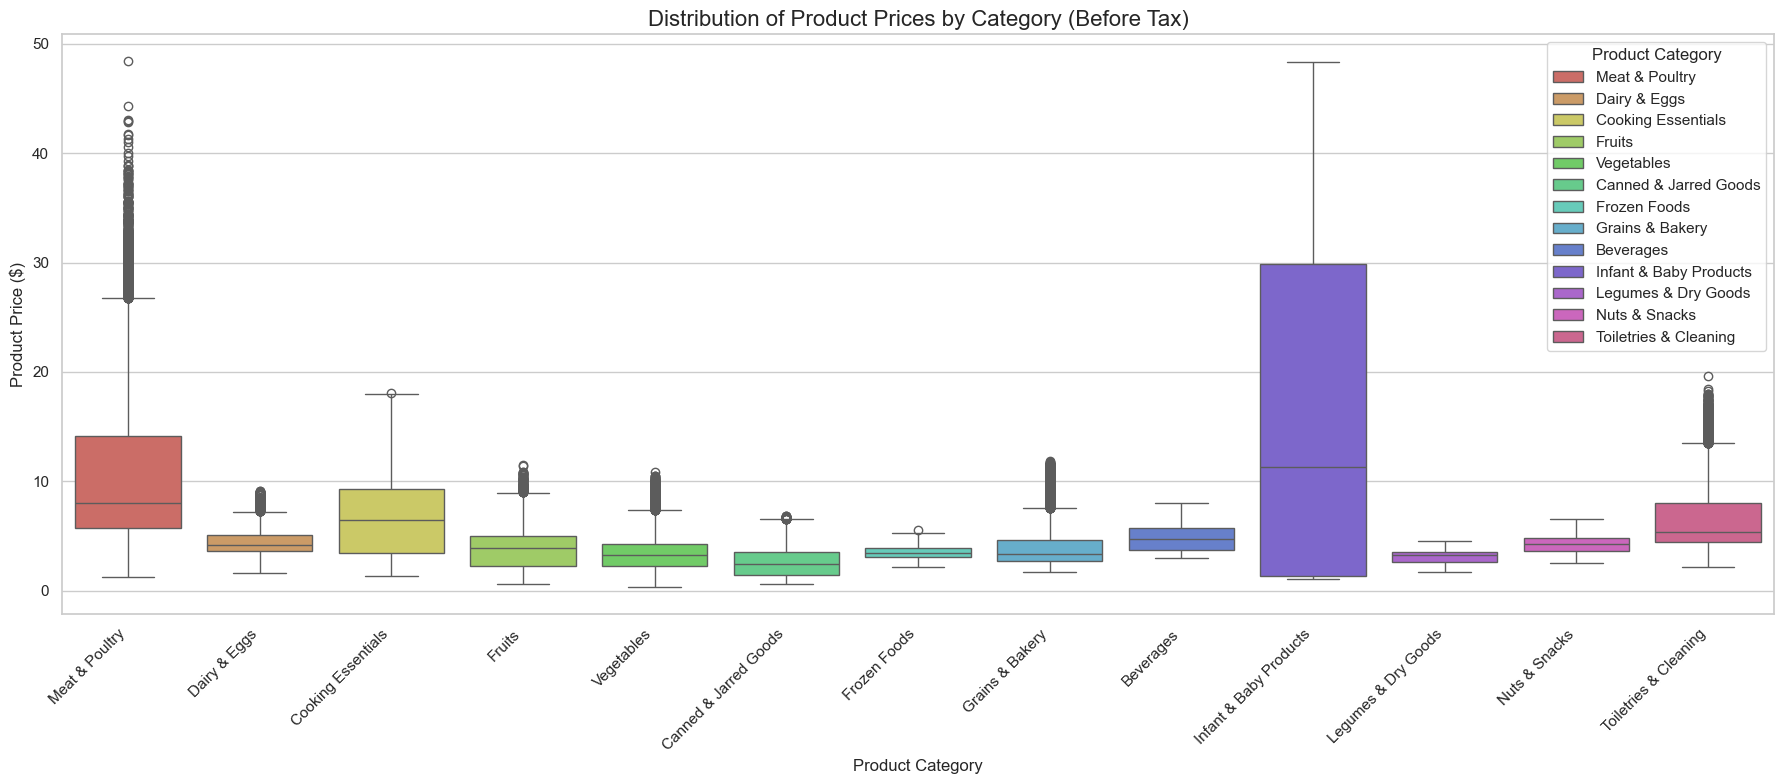

In [105]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 8))

sns.boxplot(
    data=df,
    x="Product Category",
    y="VALUE",
    hue="Product Category",
    palette="hls",
    dodge=False,
    legend=True
)

plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Product Prices by Category (Before Tax)", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Product Price ($)", fontsize=12)
plt.tight_layout()
plt.show()


<Axes: xlabel='GEO', ylabel='Total tax rate'>

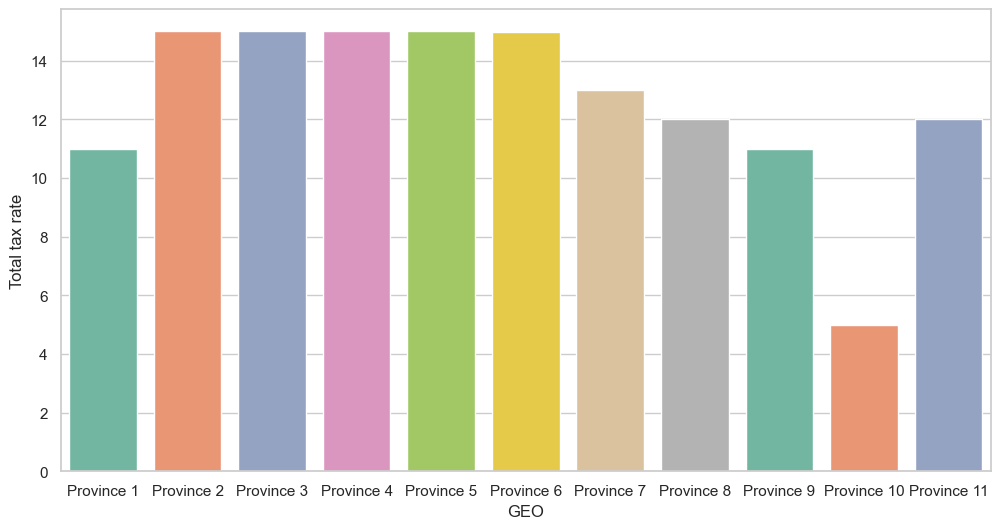

In [106]:
plt.figure(figsize=(12, 6))
order = df.groupby('GEO')['Total tax rate'].mean().sort_values().index
sns.barplot(x='GEO', y='Total tax rate', hue='GEO', data=df, palette='Set2', legend=False)


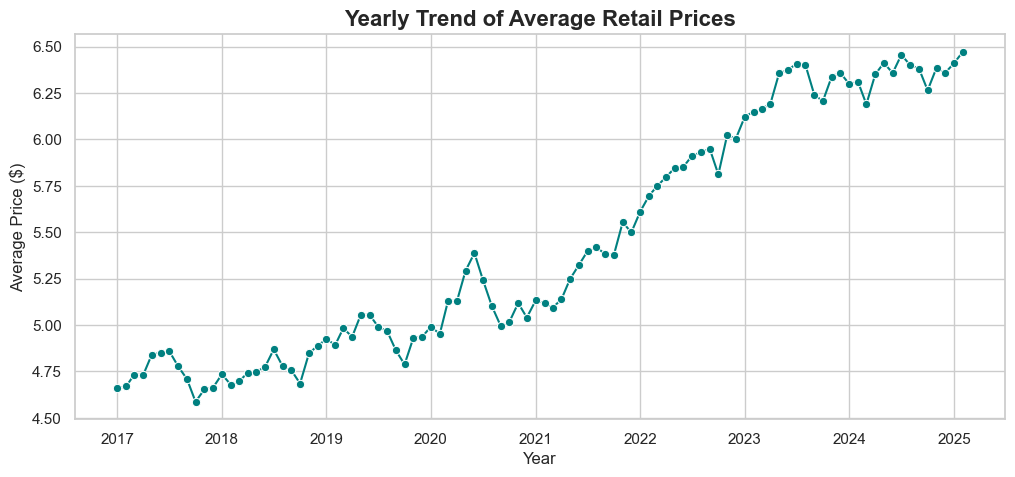

In [107]:
plt.figure(figsize=(12, 5))
yearly_avg = df.groupby("Date")["VALUE"].mean().reset_index()
sns.lineplot(data=yearly_avg, x="Date", y="VALUE", marker="o", color="teal")
plt.title("Yearly Trend of Average Retail Prices", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.grid(True)
plt.show()

In [113]:
df_numerical.info()
df_correlation = df_numerical[['Year', 'VALUE', 'Total tax rate', 'Value after tax', 'Review']]
df_correlation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118482 entries, 0 to 118481
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             118482 non-null  int64  
 1   Month            118482 non-null  object 
 2   GEO              118482 non-null  object 
 3   VALUE            118482 non-null  float64
 4   Total tax rate   118482 non-null  float64
 5   Value after tax  118482 non-null  float64
 6   COORDINATE       118482 non-null  float64
 7   UOM              118482 non-null  object 
 8   Review           118482 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 8.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118482 entries, 0 to 118481
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             118482 non-null  int64  
 1   VALUE            118482 non-null  float64
 2   Total ta

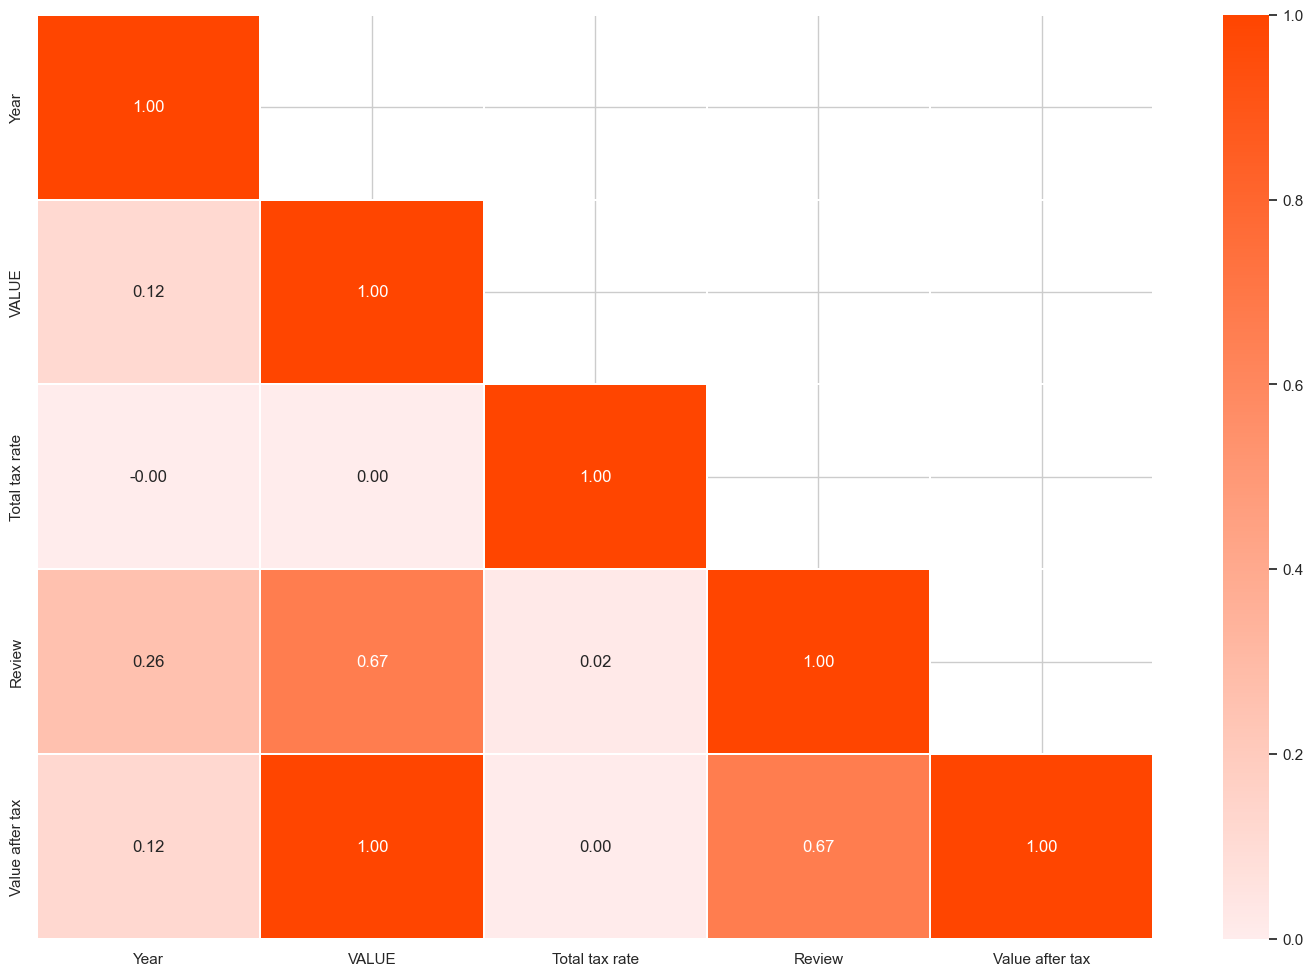

In [114]:
# Define a colormap
orangered_cmap = LinearSegmentedColormap.from_list('orangered', ['#FFECEC','orangered'])

# Calculation of the Spearman correlation
target = 'Value after tax'
df_ordered = pd.concat([df_correlation.drop(target,axis=1), df_correlation[target]],axis=1)
corr = df_ordered.corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(18,12))
sns.heatmap(corr, mask=mask, annot=True, cmap=orangered_cmap, fmt='.2f', linewidths=0.2)
plt.show()



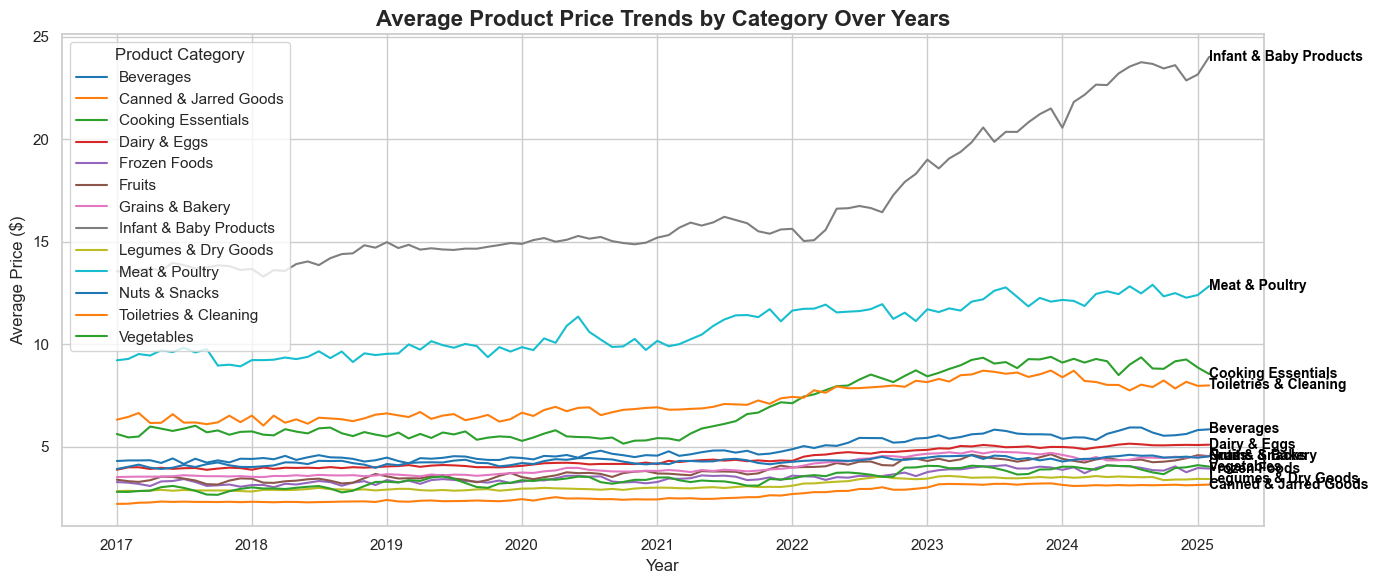

In [115]:
plt.figure(figsize=(14, 6))

# Moyenne par date et catégorie
df_grouped = df.groupby(['Date', 'Product Category'])['VALUE'].mean().reset_index()

# Tracer les courbes
sns.lineplot(data=df_grouped, x='Date', y='VALUE', hue='Product Category', palette='tab10')

# Ajouter une étiquette à la fin de chaque courbe
last_points = df_grouped.sort_values('Date').groupby('Product Category').tail(1)

for _, row in last_points.iterrows():
    plt.text(
        row['Date'], row['VALUE'],               # position x, y
        row['Product Category'],                 # texte
        fontsize=10, fontweight='bold',
        va='center', ha='left',
        color='black'
    )

# Mise en forme
plt.title("Average Product Price Trends by Category Over Years", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\alexa\AppData\Local\Temp\ipykernel_19376\3604984257.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



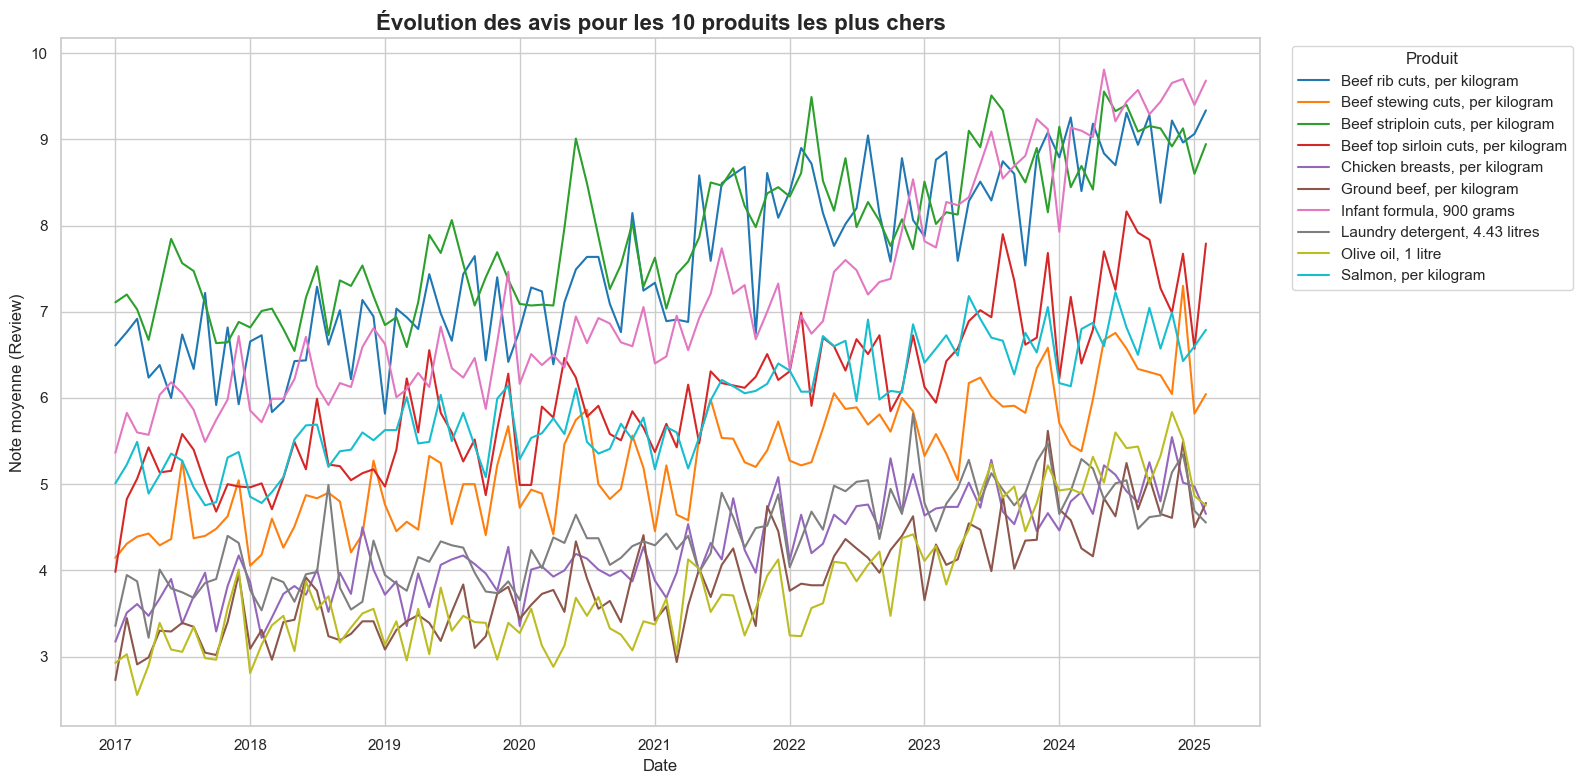

In [116]:

# 1. Calcul du prix moyen par produit
top10_products = df.groupby('Products')['VALUE'].mean().sort_values(ascending=False).head(10).index

# 2. Filtrer le DataFrame pour ces produits
df_top10 = df[df['Products'].isin(top10_products)]

# 3. S'assurer que 'Date' est bien au format datetime
df_top10['Date'] = pd.to_datetime(df_top10['Date'])

# 4. Calculer la moyenne des reviews par produit et date
df_reviews = df_top10.groupby(['Date', 'Products'])['Review'].mean().reset_index()

# 5. Tracer l'évolution
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_reviews, x='Date', y='Review', hue='Products', palette='tab10')
plt.title("Évolution des avis pour les 10 produits les plus chers", fontsize=16, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Note moyenne (Review)")
plt.legend(title="Produit", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

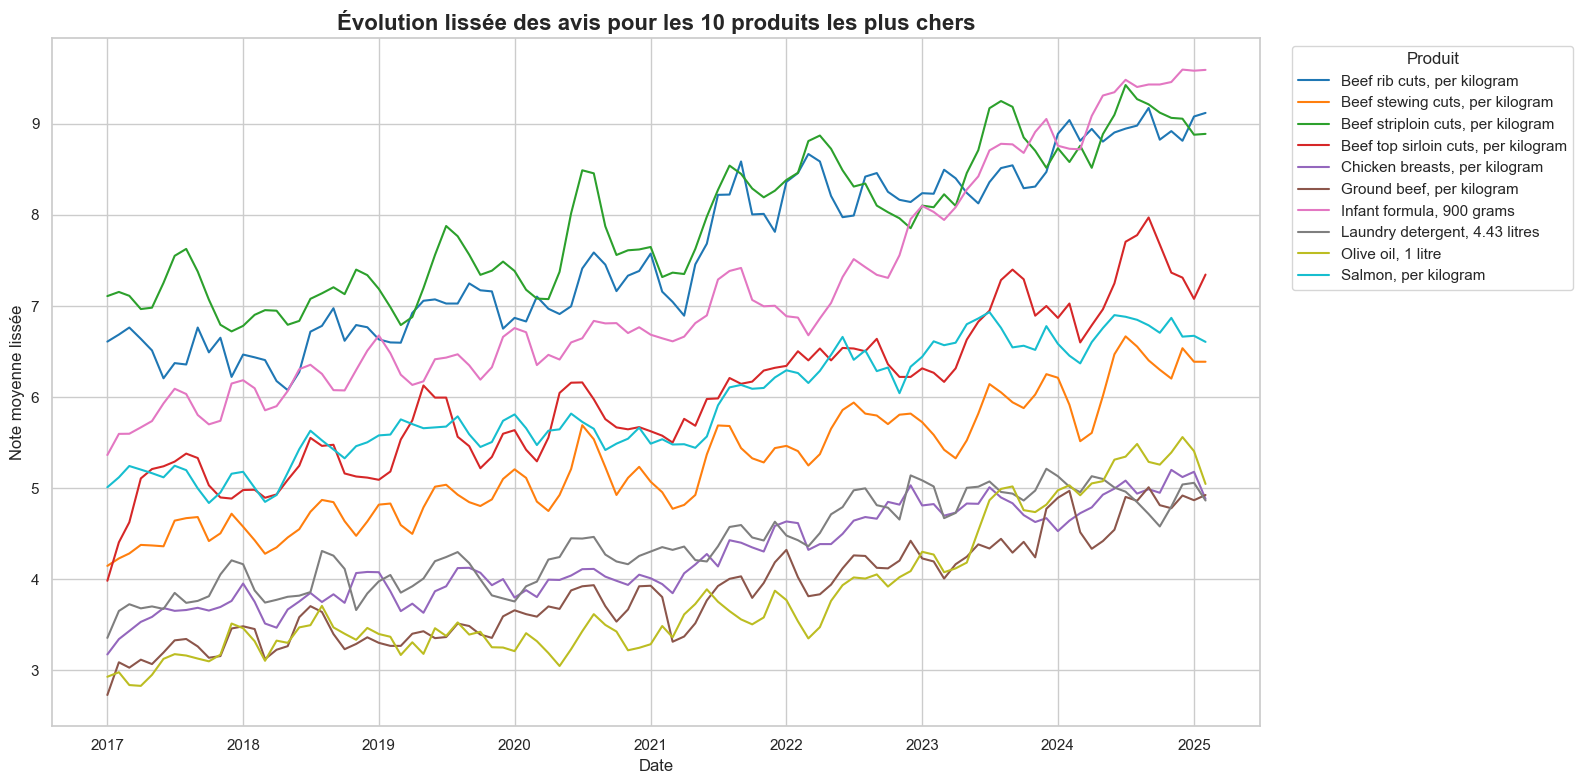

In [119]:
# 1. Calcul des 10 produits les plus chers
top10_products = df.groupby('Products')['VALUE'].mean().sort_values(ascending=False).head(10).index

# 2. Filtrage du DataFrame
df_top10 = df[df['Products'].isin(top10_products)].copy()

# 3. S'assurer que 'Date' est bien au format datetime
df_top10['Date'] = pd.to_datetime(df_top10['Date'])

# 4. Calcul de la moyenne des reviews par produit et par date
df_reviews = df_top10.groupby(['Date', 'Products'])['Review'].mean().reset_index()

# 5. Tri pour le rolling
df_reviews = df_reviews.sort_values(by=['Products', 'Date'])

# 6. Lissage avec moyenne mobile (fenêtre = 3)
df_reviews['Review_smoothed'] = df_reviews.groupby('Products')['Review'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# 7. Tracé du graphique
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_reviews, x='Date', y='Review_smoothed', hue='Products', palette='tab10')
plt.title("Évolution lissée des avis pour les 10 produits les plus chers", fontsize=16, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Note moyenne lissée")
plt.legend(title="Produit", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


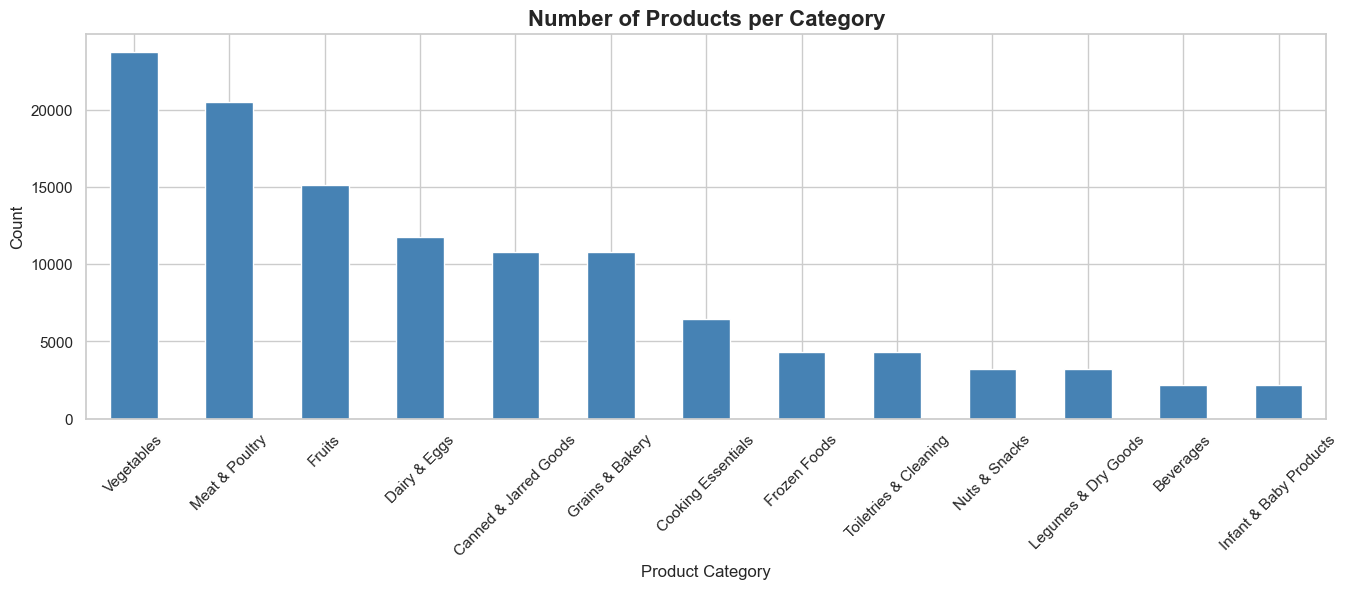

In [124]:


plt.figure(figsize=(16, 5))
df["Product Category"].value_counts().plot(kind="bar", color="steelblue")
plt.title("Number of Products per Category", fontsize=16, fontweight='bold')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



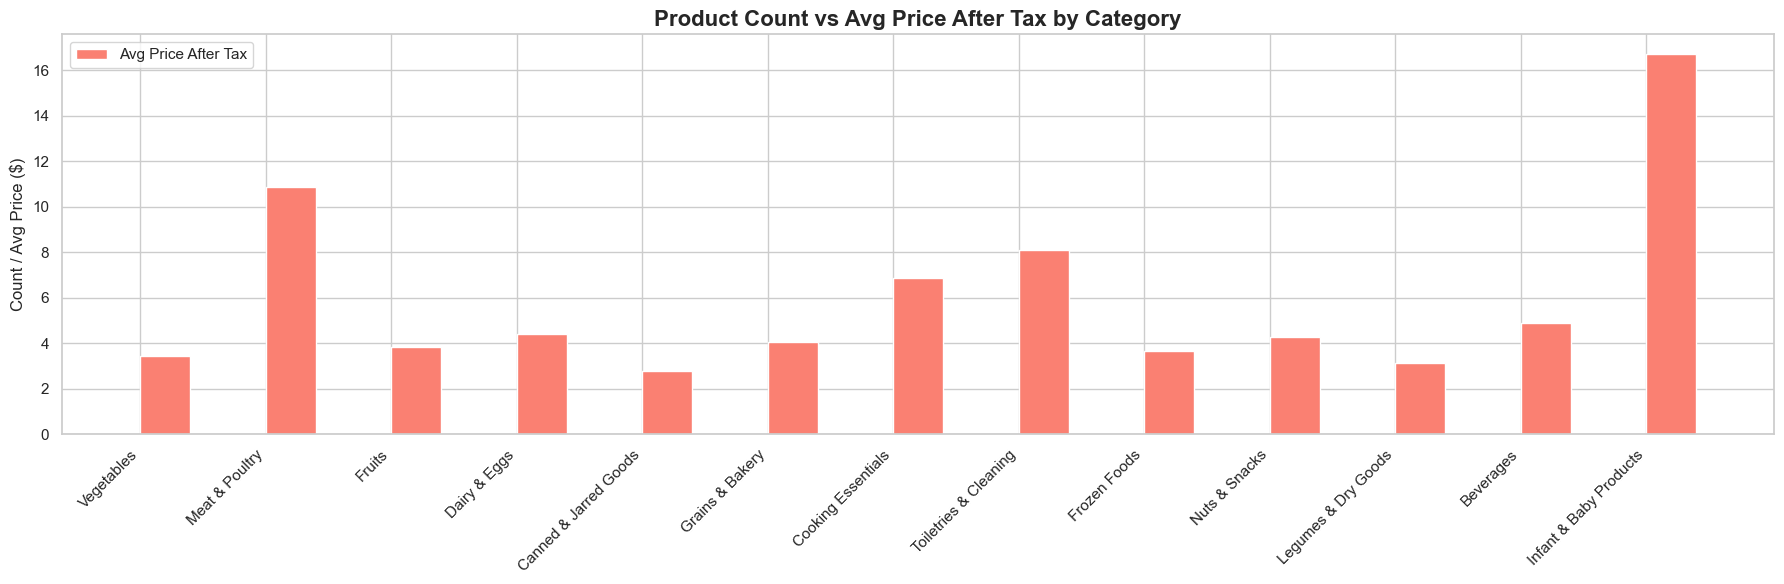

In [ ]:
# 1. Compter les produits par catégorie
count_per_category = df["Product Category"].value_counts()

# 2. Prix moyen après taxe par catégorie
avg_price_per_category = df.groupby("Product Category")["Value after tax"].mean()

# 3. Fusionner les deux
summary_df = pd.DataFrame({
    "Product Count": count_per_category,
    "Avg Price After Tax": avg_price_per_category
}).dropna()

# 4. Tracer les barres côte à côte
summary_df = summary_df.sort_values("Product Count", ascending=False)
x = summary_df.index
x_pos = range(len(x))

plt.figure(figsize=(18, 6))

# Barres pour les quantités
plt.bar(x_pos, summary_df["Product Count"], width=0.4, label="Product Count", align='center', color='steelblue')

# Barres pour les prix (décalées à droite)
plt.bar([p + 0.4 for p in x_pos], summary_df["Avg Price After Tax"], width=0.4, label="Avg Price After Tax", align='center', color='salmon')

# Réglages
plt.xticks([p + 0.2 for p in x_pos], x, rotation=45, ha='right')
plt.title("Product Count vs Avg Price After Tax by Category", fontsize=16, fontweight='bold')
plt.ylabel("Count / Avg Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
